In [44]:
#Import some librairies 
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats

In [45]:
%%capture
! pip install seaborn

In [2]:
df = pd.read_excel('good_data.xlsx')
df

,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée
0,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée
1,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé
2,Unnamed: 1,Secrétaires de Direction,Secrétariat,27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée
3,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée
4,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée
...,...,...,...,...,...,...,...,...,...,...,...
12045,1,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",1 Juil 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée
12046,1,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",2 Juil 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée
12047,1,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",2 Juil 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois
12048,1,Agent de liaison sécurité,Sécurité,2 Juil 2020,Haiti,Christ-Roi,Federation Handicap International,Sécurité,11 Juil 2020,Port-au-Prince,Déterminée


In [3]:
df.reset_index(inplace=True)
df.dropna(subset=["Date publication"],inplace=True)

In [4]:
df['Date publication'] = df['Date publication'].apply(lambda x: x.split()[1] + ' ' + x.split()[0] + ' ' + x.split()[-1])
df['Annee'] = df['Date publication'].apply(lambda x: x.split()[-1])
df.head()

,index,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
0,0,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
1,1,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2,2,Unnamed: 1,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
3,3,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
4,4,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008


In [5]:
months = {'Fév':'Feb','Avril':'Apr', 'Mai':'May', 'Juin':'Jun', 'Juil':'Jul', 'Aout':'Aug', 'Mars':'March'}
list(months.values())

['Feb', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'March']

In [6]:
for keys, values in zip(list(months.keys()), list(months.values())):
    df['Date publication'] = df['Date publication'].str.replace(keys, values)

In [7]:
df.index = pd.to_datetime(df['Date publication'])

In [8]:
df.index

DatetimeIndex(['2008-09-27', '2008-09-27', '2008-09-27', '2008-09-27',
               '2008-09-27', '2008-10-03', '2008-10-01', '2008-09-10',
               '2008-10-10', '2008-10-10',
               ...
               '2020-06-22', '2020-06-22', '2020-06-26', '2020-06-26',
               '2020-07-01', '2020-07-01', '2020-07-02', '2020-07-02',
               '2020-07-02', '2020-07-02'],
              dtype='datetime64[ns]', name='Date publication', length=10795, freq=None)

In [9]:
df.shape

(10795, 13)

In [10]:
df

,index,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,,,
2008-09-27,0,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,1,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2008-09-27,2,Unnamed: 1,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,3,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,4,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12045,1,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,12046,1,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,12047,1,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois,2020


In [11]:
df['Date publication'].isna().sum()

0

In [12]:
df.drop(columns='index')

,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,,
2008-09-27,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2008-09-27,Unnamed: 1,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,1,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,1,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,1,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois,2020


In [13]:
df.drop(columns='Unnamed: 0')

,index,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,,
2008-09-27,0,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2008-09-27,2,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,3,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,4,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12045,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,12046,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,12047,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois,2020


In [22]:
df.isnull().sum()

index                  0
Unnamed: 0             0
Titre du poste         0
Domaine                0
Date publication       0
Pays                   0
Zone                1697
Compagnie              0
Spécialité           391
Date limite            0
Ville               5216
Durée                 19
Annee                  0
dtype: int64

In [25]:
df['Zone'] = df.Zone.fillna('Non définie')
df['Spécialité'] = df.Spécialité.fillna('Non définie')
df['Ville'] = df.Ville.fillna('Non définie')

In [27]:
df = df.drop(columns=['index','Unnamed: 0'])

In [81]:
df.loc[df['Compagnie'] == 'ong', 'Compagnie'] = "Autres ONG's"
df.loc[df['Compagnie'] == 'prive', 'Compagnie'] = "Secteur privé"

# Domain cleaning
df.loc[df['Domaine'] == '- - Non-defini - -', 'Domaine'] = 'Non défini'


In [16]:
df= df.drop_duplicates(subset=None, keep='first', inplace=False)
df

,index,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,,,
2008-09-27,0,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,1,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2008-09-27,2,Unnamed: 1,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,3,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,4,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12045,1,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,12046,1,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,12047,1,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois,2020


In [30]:
df

,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,
2008-09-27,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,Non définie,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,Non définie,Indéterminée,2008
2008-09-27,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,Non définie,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,Non définie,Indéterminée,2008
2008-09-27,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,Non définie,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,Non définie,Indéterminée,2008
2008-09-27,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,Non définie,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,Non définie,Indéterminée,2008
2008-09-27,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,Non définie,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,Non définie,Indéterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Non définie,Plan International-Haiti,Management/Gestion,8 Juil 2020,Non définie,Déterminée (court terme),2020


###### In this section, nous allons categoriser la duree des contrats en contrat a duree determinee [12 mois et plus], determinee (court terme) [moins de 12 mois] et contrat a duree indeterminee. Etant donné la structure des donnees, nous ne traiterons qu'environ 9000 donnees, car cela prendrait beaucoup de temps pour le traitement total. 

In [17]:
# Nous ciblons les cellules et procedons aux remplacements

df.loc[df['Durée'] == '6 mois (Renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'six (6) mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'douze (12) mois renouvelables après évaluation des performances', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'douze (12) mois renouvelable après évaluation.', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'This will be a full-time assignment working on the PPSELD calendar as defined by PPSELD management', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée (1 an renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Full-Time', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an (renewable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Long-term consulting assignment', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'contract', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '126 jours (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '57 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'huit (8) mois renouvelables pour une année au regard des performances du Contractuel et de la disponibilité de financement du projet', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'à définir', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Contrat de 2 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Trois (3) années', 'Durée'] = 'Déterminée'

df.loc[df['Durée'] == '1 an (avec possibilité de renouvellement), période de probation de trois mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois Renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Déterminée: 10 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'non défini', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Décembre 2017', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: 3 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Contrat de 6 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '13 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois, renouvelable 12 mois sous condition de performance satisfaisante', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '12 mois renouvelables pendant toute la durée du projet (3 ans) au gré des parties', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Undetermined', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '6 mois(renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 mois avec possibilité de prolongation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 à 6 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '30 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 Months', 'Durée'] = 'Déterminée (court terme)'



df.loc[df['Durée'] == '1 month & renewable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'sept (7) mois allant de mars à septembre 2020', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '5 semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'CDD (4 ans)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Three-month probation with possibility of extension after satisfactory evaluation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '31 Août 2010', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contract based', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '12 mois renouvelables incluant les 3 mois de probation', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '60 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Contrat à durée déterminée de 6 mois renouvelables', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Permanente', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'douze (12) mois renouvelables après une période de probation de trois (3) mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Through the duration of the Project', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '9,5 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'indeterminee', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == "3 mois avec possibilité d'extension", 'Durée'] = 'Déterminée (court terme)'


df.loc[df['Durée'] == 'Jusqu’au 30 Septembre 2016 puis 1 an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indéterminé après période probatoire de trois (3) mois', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 year, renewable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indeterminado', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 an (renouvlable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 année (renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'indéterminée', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 an, renouvelable sur 3 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois (avec possibilité de renouvellement)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Durée déterminée (1 an renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '10 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois renouvable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois, renouvelables selon financement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'


df.loc[df['Durée'] == '3 Semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '7 semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 mois (renouvlable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 months (with possibility of extension)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 an renouvlable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Determinee (4 ans)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat de 7 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Three-month probation contract with possibility of one-year extension after satisfactory evaluation', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == "3 mois avec possibilité d'extension', 'Durée"] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '45 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Fixed term contract', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée /1 an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'un an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Permanent position', 'Durée'] = 'Indéterminée'


df.loc[df['Durée'] == '3 ans et demi', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'CDD renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an (renouvelable après évaluation)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'We are looking for along term commitment preferably two years (negotiable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'One year', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Long-term', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'OPEN ENDED CONTRACT', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Open ended', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Ce poste est base sur la durée de vie du projet', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '120 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois avec possibilite de renouvellement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 months renewable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '4 mois avec possibilité d’extension', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "3 mois avec possibilité d'extension', 'Durée"] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Trois mois de probation avec possibilité de renouvellement après évaluation satisfaisante', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '10 months', 'Durée'] = 'Déterminée (court terme)'


df.loc[df['Durée'] == '1an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 months, with a 3-month probationary period and potential for renewal', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == ': Déterminé jusqu’à la fin de l’année de 2021 (avec possibilité d’extension', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == "12 mois avec une possibilite d'extension", 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indeterminee', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == "Trois mois de probation avec possibilité d'extension d'une année", 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (renouvelable après évaluation)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '4 Months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (avec possibilité d’extension)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 month with possibility of extension', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '10 jours', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indéterminée, période probatoire de 3 mois', 'Durée'] = 'Indéterminée'


df.loc[df['Durée'] == '1 an avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'un (1) an renouvelable sur base de performance', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 An Renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an, renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: Deux (2) ans – Juillet 2017 jusqu’à Juin 2019', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois (avec possibilité de prolongation)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an (avec possibilité de renouvellement)', 'Durée'] = 'Déterminée'



df.loc[df['Durée'] == 'One year with potential to extend', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'deux (2) ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determinée (12 mois)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: 1 an avec possibilité de renouvellement.', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '5 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat de 12 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: 12 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'contrat de 14 mois (sous réserve d’obtention des fonds).', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Temps plein, exclusivité d’emploi', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Indéterminé', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Open-Ended', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois avec possibilité d’extension.', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Three-month probation with possibility of one-year extension', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 MOIS', 'Durée'] = 'Déterminée (court terme)'



df.loc[df['Durée'] == '4 années', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 Annee (Renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Three-month probation contract with possibility of extension after satisfactory evaluation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois avec possibilité de prolongation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'non defini', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Contrat de 6 mois renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (Possibilité de renouvellement)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois (possibilité de renouvellement selon besoin)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'contrat de 14 mois (sous réserve d’obtention des fonds)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'CDI', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Full-time local position', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Long Term', 'Durée'] = 'Indéterminée'


df.loc[df['Durée'] == '1 year, extendable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 year renewable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1.5 month', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 semaines', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '9 MOIS', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Trois mois de probation avec possibilite de renouvellement apres evaluation satisfaisante', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois, renouvelable', 'Durée'] = 'Déterminée'


df.loc[df['Durée'] == 'trois ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '17 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'October 1,2013 to March 31, 2016', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 AN', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 Year with possibility for extension', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 An', 'Durée'] = 'Déterminée'


df.loc[df['Durée'] == 'un an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '15 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois avec possibilite de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 month contract', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat à durée déterminée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an Renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 Mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '4 ans', 'Durée'] = 'Déterminée'



df.loc[df['Durée'] == '5 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Déterminee', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an (Renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Permanent', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Contrat', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '24 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '2 years', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '2 years', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '11 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "6 mois (renouvelable sur une base d'évaluation)", 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '15 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 months', 'Durée'] = 'Déterminée (court terme)'

df.loc[df['Durée'] == '12 mois avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == "12 mois avec possibilité d'extension", 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'déterminé', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'A déterminer', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Non defini', 'Durée'] = 'Non définie'




df.loc[df['Durée'] == 'Determine', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Temporaire', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Open Ended', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '12 mois, renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'open-ended', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '3 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Un (1) an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '2 ans renouvelables', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '6 mois sur une base renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '12 mois renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Through March 31, 2016', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 months', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois renouvelables', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 months with possibility of extension', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'The assignment is estimated as a life of project position.', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '3 mois renouvelables', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois renouvelables', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) An', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Permanent Position with at first a one year contract', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '3 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determinee', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Long term contract', 'Durée'] = 'Déterminée'




df.loc[df['Durée'] == 'déterminée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indeterminée', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Determinee', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 year (renewable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée (1 an)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat CDD, 12 mois avec 3 mois  comme periode probatoire', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat CDD, 12 mois avec 3 mois mois comme periode probatoire', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '6 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '7 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '12 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Until January 31, 2021, possible to be extended.', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (conditionnel à l’obtention du financement)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 an (renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois avec possibilité de renouvellement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Indeterminé', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Determiné', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determinée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determiné', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminé', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'CDD', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Poste permanent (contrat d’un an, qui sera renouvelé sous forme de contrat à durée indéterminée en fonction des performances du candidat)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '18 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '4 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Determinée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 year', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '10 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '8 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '5 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Un an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 Year', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "Trois mois de probation avec possibilité d'extension après évaluation satisfaisante", 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "12 mois renouvelable sur la base d'évaluation", 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '6 mois avec possibilité de renouvellement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 année renouvelable', 'Durée'] = 'Déterminée'





In [82]:
# Nous selectionnons ici que les cellules avec la duree des contrats comme predefini: Indeterminee, Determinee, Determinee (court terme) et Non definie.
df_a = df[df.Durée=='Déterminée']
df_b = df[df.Durée=='Déterminée (court terme)']
df_c = df[df.Durée=='Indéterminée']
df_d = df[df.Durée=='Non définie']

df_first = pd.concat([df_a, df_b, df_c, df_d])



In [83]:
df_first = df_first.drop(columns= ['Pays', 'Zone','Date limite'])


In [84]:
companies = df_first.Compagnie.value_counts().to_frame()
top_recruit_companies = companies[:10]
top_recruit_companies

,Compagnie
Catholic Relief Services,567
Plan International-Haiti,282
Autres ONG's,255
CARE Haiti,250
Save the Children en Haiti,249
Secteur privé,248
Concern Worldwide Haiti,232
Organisation Haïtienne de Maketing Social pour la Santé (PSI-Haïti),183
Croix Rouge Americaine,174
GOAL Haiti,170


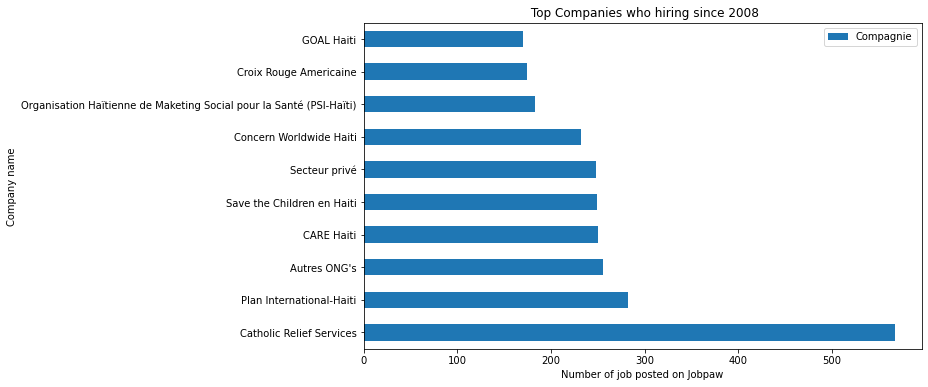

In [87]:
top_recruit_companies.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of job posted on Jobpaw') # add to x-label to the plot
plt.ylabel('Company name') # add y-label to the plot
plt.title(' Top Companies who hiring since 2008') # add title to the plot

plt.show()

In [ ]:
#df[df['Titre du poste'].str.contains('Comptable')]

In [ ]:
df_first['Titre du poste'].value_counts().to_frame()

In [88]:
specialities = df_first['Spécialité'].value_counts().to_frame()
top_specialities = specialities[:10]
top_specialities

,Spécialité
Management/Gestion,1231
Comptabilité,556
Agronomie,367
Sciences Sociales,362
Gestion de Projets,362
Santé Publique,339
Non définie,328
Communication,273
Génie Civil,264
Finance et Banque,231


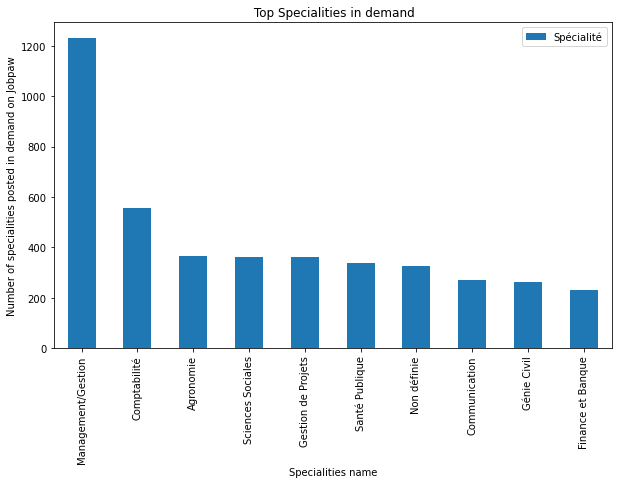

In [91]:
top_specialities.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Specialities name') # add to x-label to the plot
plt.ylabel('Number of specialities posted in demand on Jobpaw') # add y-label to the plot
plt.title(' Top Specialities in demand') # add title to the plot

plt.show()

In [93]:
domain = df_first.Domaine.value_counts(normalize=True).to_frame()
top_domain = domain[:10]
top_domain

,Domaine
"Management/Gestion, Finance, Comptabilité et Commerce",0.337758
Santé et Professions médicales,0.114517
Sciences Humaines et Sociales,0.106827
Agriculture – Agroalimentaire,0.065529
Sciences de l’Ingénieur,0.053835
Sciences Informatiques,0.038137
Sciences économiques et politiques,0.036452
Transport et Logistique,0.034450
Sciences de l’Education,0.034029
Secrétariat,0.033818


(0.0, 1.0)

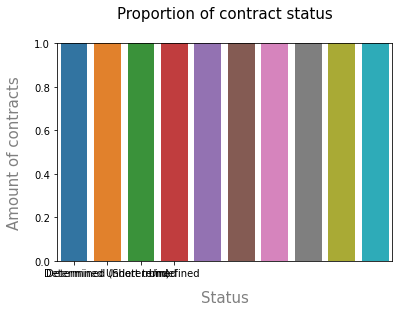

In [97]:
sns.countplot(x='Domaine', data=top_domain)
plt.xticks([0, 1,2,3], ['Determined', 'Determined (Short term)','Undetermined', 'Undefined'])
plt.xlabel('Status', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of contracts', size=15, labelpad=12, color='grey')
plt.title("Proportion of contract status", size=15, pad=25)
plt.ylim(0, 1)

In [39]:
df_first.Domaine.value_counts().to_frame()

,Domaine
"Management/Gestion, Finance, Comptabilité et Commerce",3206
Santé et Professions médicales,1087
Sciences Humaines et Sociales,1014
Agriculture – Agroalimentaire,622
Sciences de l’Ingénieur,511
Sciences Informatiques,362
Sciences économiques et politiques,346
Transport et Logistique,327
Sciences de l’Education,323
Secrétariat,321


In [42]:
df_first.Domaine.value_counts(normalize=True).to_frame()

,Domaine
"Management/Gestion, Finance, Comptabilité et Commerce",0.337758
Santé et Professions médicales,0.114517
Sciences Humaines et Sociales,0.106827
Agriculture – Agroalimentaire,0.065529
Sciences de l’Ingénieur,0.053835
Sciences Informatiques,0.038137
Sciences économiques et politiques,0.036452
Transport et Logistique,0.034450
Sciences de l’Education,0.034029
Secrétariat,0.033818


In [40]:
df_first.Durée.value_counts().to_frame()

,Durée
Indéterminée,5403
Déterminée,3006
Déterminée (court terme),1052
Non définie,31


In [41]:
df_first.Durée.value_counts(normalize=True).to_frame()

,Durée
Indéterminée,0.569216
Déterminée,0.316688
Déterminée (court terme),0.110830
Non définie,0.003266


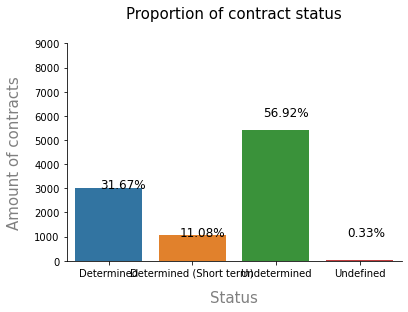

In [94]:
amount_undetermined = df_first.Durée.value_counts()[0] / df_first.shape[0] * 100
amount_determined = df_first.Durée.value_counts()[1] / df_first.shape[0] * 100
amount_determined_short = df_first.Durée.value_counts()[2] / df_first.shape[0] * 100
amount_undefined = df_first.Durée.value_counts()[3] / df_first.shape[0] * 100

sns.countplot(x='Durée', data=df_first)
plt.xticks([0, 1,2,3], ['Determined', 'Determined (Short term)','Undetermined', 'Undefined'])
plt.xlabel('Status', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of contracts', size=15, labelpad=12, color='grey')
plt.title("Proportion of contract status", size=15, pad=25)
plt.ylim(0, 9000)
plt.text(-0.10, 3000, f"{round(amount_determined, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_determined_short, 2)}%", fontsize=12)
plt.text(1.85, 6000, f"{round(amount_undetermined, 2)}%", fontsize=12)
plt.text(2.85, 1000, f"{round(amount_undefined, 2)}%", fontsize=12)

sns.despine()

In [ ]:
df1 = df_first.groupby('Compagnie')['Domaine'].count().to_frame().sort_values(by='Domaine', ascending=False)
df1

In [ ]:
df_first.Compagnie.unique().shape

In [ ]:
df_first

In [ ]:
years = df_first.groupby('Domaine')['Annee'].count().sort_values#(by='Domaine')
years

In [ ]:
job_before = df_first.loc['2009-01-12':'2010-01-12']
job_before

In [ ]:
job_before.Domaine.value_counts().to_frame()

In [ ]:
job_afterMonths = df_first.loc['2010-01-12':'2010-6-12']
job_after

In [ ]:
job_afterMonths.Domaine.value_counts().to_frame()

In [ ]:
job_afterMonths.Spécialité.value_counts().to_frame()

In [ ]:
job_afterYear = df_first.loc['2010-01-12':'2011-01-12']
job_afterYear

In [ ]:
job_after.Domaine.value_counts().to_frame()

In [ ]:
#df2 = df.groupby('Compagnie')['Domaine'].sum().to_frame().reset_index().sort_values(by='Domaine', ascending=False)
#df2

In [ ]:
company = df.groupby('Compagnie')
company

In [ ]:
company.get_group('Save the Children en Haiti')

In [ ]:
df['Annee'] = df['Date publication'].apply(lambda x: x.split()[-1])
#df['Date publication'] = df['Date publication'].apply(lambda x: x.split()[1] + ' ' + x.split()[0] + ' ' + x.split()[-1])
df.head()

In [ ]:
years = df.groupby('Spécialité')['Annee'].count().to_frame()
years

In [ ]:
specialite = df.groupby(['Spécialité','Annee'])['Compagnie'].count().to_frame()
specialite.tail(10)

In [ ]:
years = df.groupby(['Annee','Spécialité'])['Compagnie'].value_counts().to_frame()
years

In [ ]:
years1 = df.Annee.value_counts(sort=False).to_frame()
years1